## Apparatus

In [35]:
# data collected from the experiment 
# H(t) = H_t , X(t) = X_t , t = t
H_t = np.array([1,2,3,4,5,6])
X_t = np.array([1,2,3,4,5,6])
t = np.array([1,2,3,4,5,6])

# other values
H0 = 18 # initial water level in tank
Y0 = 5.5 # level of the hole from the ground

In [36]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [6, 4]

# centering the output graphs
from IPython.core.display import HTML as Center
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## 1) $X^2$ vs $H(t)$

experimental value of slope of graph is = 0.13689700130378102
theoretical value = 22.0

percentage error = 0.9937774090316464


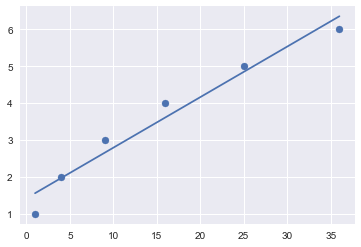

In [44]:
X_t_squared = np.array([i**2 for i in X_t])
plt.scatter(X_t_squared,H_t)

# linear regression to find slope
m, b = np.polyfit(X_t_squared, H_t, 1)
plt.plot(X_t_squared, m*X_t_squared + b)

print('experimental value of slope of graph is = ' + str(m))
print('theoretical value = ' + str(4*Y0) + '\n')

# error in experimental value
print('percentage error = ' + str(abs((m - 4*Y0)/(4*Y0))))
plt.show()


## 2) $H(t)$ vs $t$

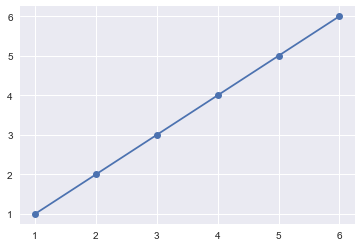

In [31]:
plt.plot(H_t,t,'-o')
plt.show()

## 3) $\ln(X)$ vs $t$

slope of graph is 2.7318264522414704
intercept of graph is 0.5044379171815084

theoretical intercept of graph = 2.9907071056272403
percentage error in intercept = 83.13315549247967


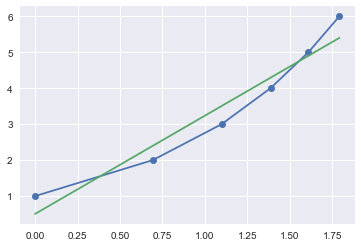

In [50]:
import math
X_t_ln = np.array([math.log(i) for i in X_t])
plt.plot(X_t_ln,t,'-o')

# linear regression to get slope and intercept
m, b = np.polyfit(X_t_ln, t, 1)
plt.plot(x, m*x + b)

print('slope of graph is ' + str(m))
print('intercept of graph is ' + str(b))
print()

b_theoretical = math.log(4*Y0*H0)/2
print('theoretical intercept of graph = '+ str(b_theoretical))
print('percentage error in intercept = '+str(100*abs((b - b_theoretical)/b_theoretical)))

plt.show()

## 4) Viscosity of water

From the above plot we can find the slove which will be theoretically equal to $ -\frac{k}{2A} $

This comes from the equation :
$$ \ln(X) = \frac{\ln(4Y_0 H_0)}{2} - \frac{k}{2A}t $$

where 

$$ k = \frac{\pi r^4 \rho g }{8 \eta l} \;\; , gradient(\alpha) = \frac{\pi r^4 \rho g }{16 A \eta l} $$ 

here 
* $\rho$ is density 
* $g$ is gravitational acceleration
* $r$ is the radius of pipe
* $l$ is the length of pipe
* $A$ is the cross-sectional area of tank

Therefore to get $\eta$ (viscosity)

$$ \eta = \frac{\pi r^4 \rho g }{16 A l \alpha} $$

where $\alpha$ is the slope obtained in last plot

In [54]:
pi = math.pi
r = 1
rho = 0.99997 # at 25 degree celcius
g = 9.8 
A = 1
l = 1
alpha = 1 # calulated from previous graph

viscosity = (pi * r**4 * rho * g)/(16 * A * l * alpha )
print('experimental value of viscosity of water is \n' + str(viscosity) + ' units')

experimental value of viscosity of water is 
1.9241677735587386 units


### Error analysis of viscosity

$$ \eta = \frac{\pi r^4 \rho g }{16 A l \alpha} $$

$$ \frac{\Delta\eta}{\eta} = 4\frac{\Delta r}{r} + \frac{\Delta A}{A} + \frac{\Delta l}{l}  $$

In [65]:
delta_r = 0.1
delta_l = 0.1
delta_A = 0.1*math.sqrt(A)

relative_error_in_eta = (4*delta_r)/delta_r + delta_A/A + delta_l/l

print('relative error in viscosity = ' + str(relative_error_in_eta))
adj = viscosity*relative_error_in_eta
print('absolute error in viscosity = ' + str(viscosity*relative_error_in_eta))

print('actual value of viscosity = ' + str(viscosity) + ' +- ' + str(adj))

relative error in viscosity = 4.199999999999999
absolute error in viscosity = 8.081504648946702
actual value of viscosity = 1.9241677735587386 +- 8.081504648946702
